**Multicollinearity investigation**

In [33]:
import pandas as pd
import seaborn as sns
import numpy as np

In [34]:
df = pd.read_csv('hw1_dataset.csv')

Firstly let's check correlation matrix for pearson coefficient 

In [35]:
correlations_df = df.iloc[:, 11:].corr(method='pearson').abs()

<AxesSubplot: >

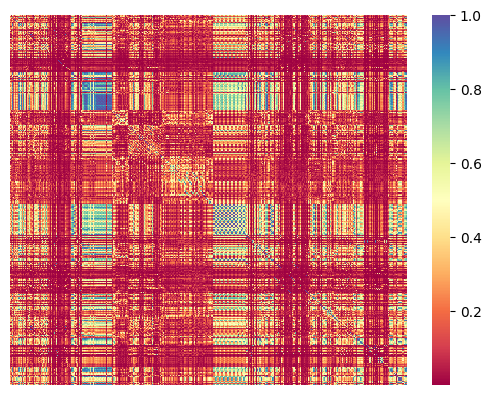

In [36]:
sns.heatmap(correlations_df, cmap = "Spectral", yticklabels=False, xticklabels=False)

Correlation matrix shows correlation coefficients between each column in df, but i this case it is not very informative, we can see that some variables are correlated, some not. Let's remove all columns which are highly correlated.

In [37]:
# First choose upper triangle
triangle = correlations_df.where(np.triu(np.ones(correlations_df.shape), k=1) != 0)

In [38]:
# Check all correlated columns
correlated_columns = [column for column in triangle.columns if any((triangle[column] > 0.5))]

In [39]:
# Now we can remove these columns 
low_correlation = df.drop(correlated_columns, axis=1)

<AxesSubplot: >

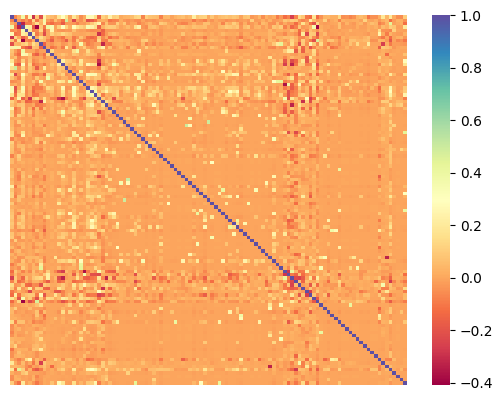

In [40]:
# Now let's plot correlation matrix in this case
low_correlations_df = low_correlation.iloc[:, 11:].corr(method='pearson')
sns.heatmap(low_correlations_df, cmap = "Spectral", yticklabels=False, xticklabels=False)

In [41]:
low_correlations_df.columns.shape[0]
# Still a lot of columns, but at least we can see that most are not correlated at all

109

*Non-linear correlations*

We can also check if some of these columns are still non-linearly correlated by utilizing spearman coefficient

In [42]:
correlations_df_spearman = low_correlations_df.iloc[:, 11:].corr(method='spearman')

<AxesSubplot: >

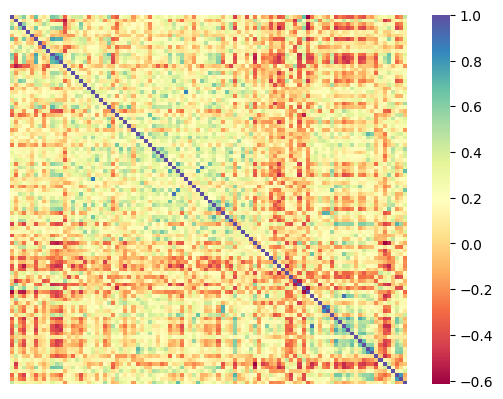

In [43]:
sns.heatmap(correlations_df_spearman, cmap = "Spectral", yticklabels=False, xticklabels=False)

We can see that there are some strong positive and negative non-linear correlations, we can get rid of them too

<AxesSubplot: >

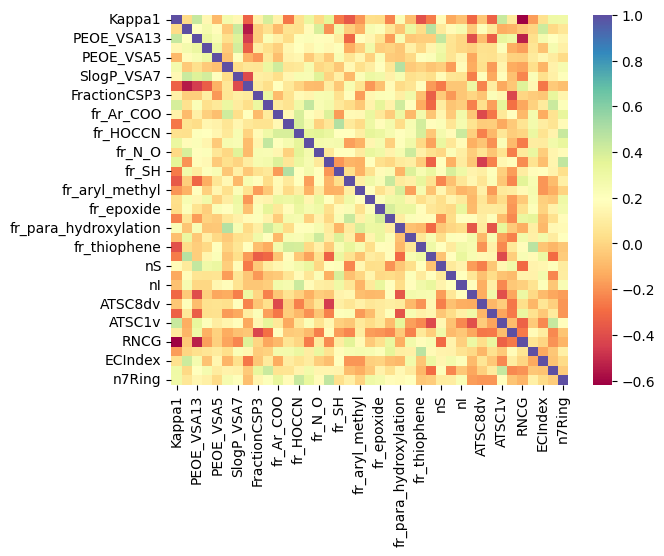

In [44]:
# First choose upper triangle
triangle = correlations_df_spearman.where(np.triu(np.ones(correlations_df_spearman.shape), k=1) != 0)

# Check all correlated columns
correlated_columns = [column for column in triangle.columns if any((triangle[column] > 0.5))]

# Now we can remove these columns 
low_correlation = low_correlations_df.drop(correlated_columns, axis=1)

# Now let's plot correlation matrix in this case
low_correlations_df = low_correlation.iloc[:, 11:].corr(method='spearman')
sns.heatmap(low_correlations_df, cmap = "Spectral")

We can see that out of all values there aren't many completely non-correlated ones. No wonder, >2000 descriptors means that most of them are just transformed other descriptors. But it is not very important, as we still have to use >1000 descriptors dataset